In [2]:
import numpy as np
from comet_ml import Experiment
import json
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import (feature, filters, measure, morphology, segmentation, util, io)
from skimage.color import rgb2gray, label2rgb

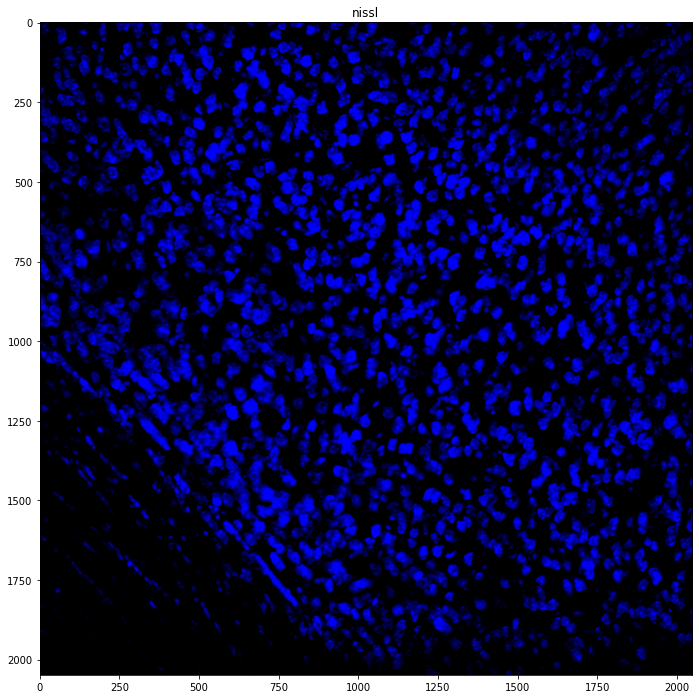

In [4]:
image = io.imread('../data/raw/0104_p301s_nissl.jpg') 
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
ax.imshow(image, cmap='gray')
ax.set_title('nissl')
plt.show()

In [8]:
# use filters.threshold_multiotsu to define the threshold between cell and background
thresholds = filters.threshold_multiotsu(image_gray, classes=2)
# find out which pixels belongs to a cell (1), and whic pixel belongs to the background (0) to segment
regions = np.digitize(image_gray, bins=thresholds)

image_gray = rgb2gray(image)
cells = image_gray > thresholds[0]
background = image_gray <= thresholds[0]
labeled_cells = measure.label(cells)
cells.shape

(2048, 2048)

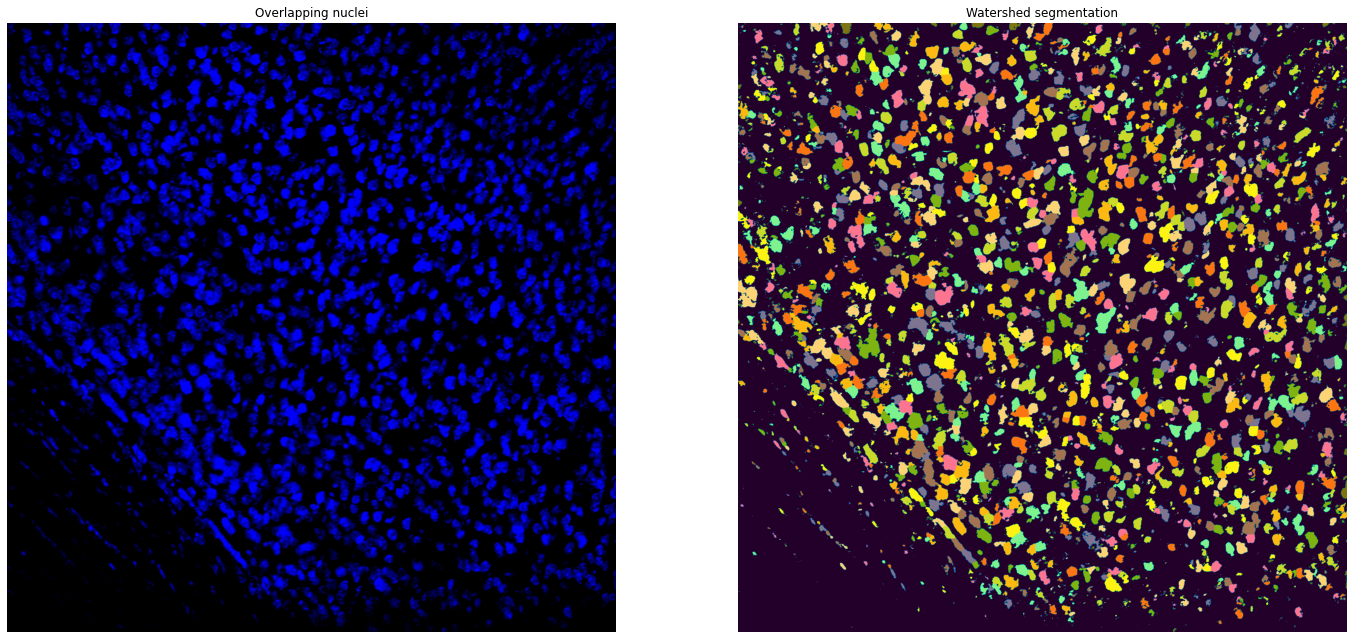

In [40]:
# find distance to closest background element for all pixels in all cells
distance = ndi.distance_transform_edt(cells)
# find peaks in image
local_max_coords = feature.peak_local_max(distance, min_distance=10)
local_max_mask = np.zeros(distance.shape, dtype=bool)
local_max_mask[tuple(local_max_coords.T)] = True
markers = measure.label(local_max_mask)

segmented_cells = segmentation.watershed(-distance, markers, mask=cells)


fig, ax = plt.subplots(ncols=2, figsize=(24, 12))
ax[0].imshow(image)
ax[0].set_title('Overlapping nuclei')
ax[0].axis('off')
ax[1].imshow(cells)
ax[1].imshow(label2rgb(segmented_cells, bg_label=0), alpha=0.5)
ax[1].set_title('Watershed segmentation')
ax[1].axis('off')
plt.show()

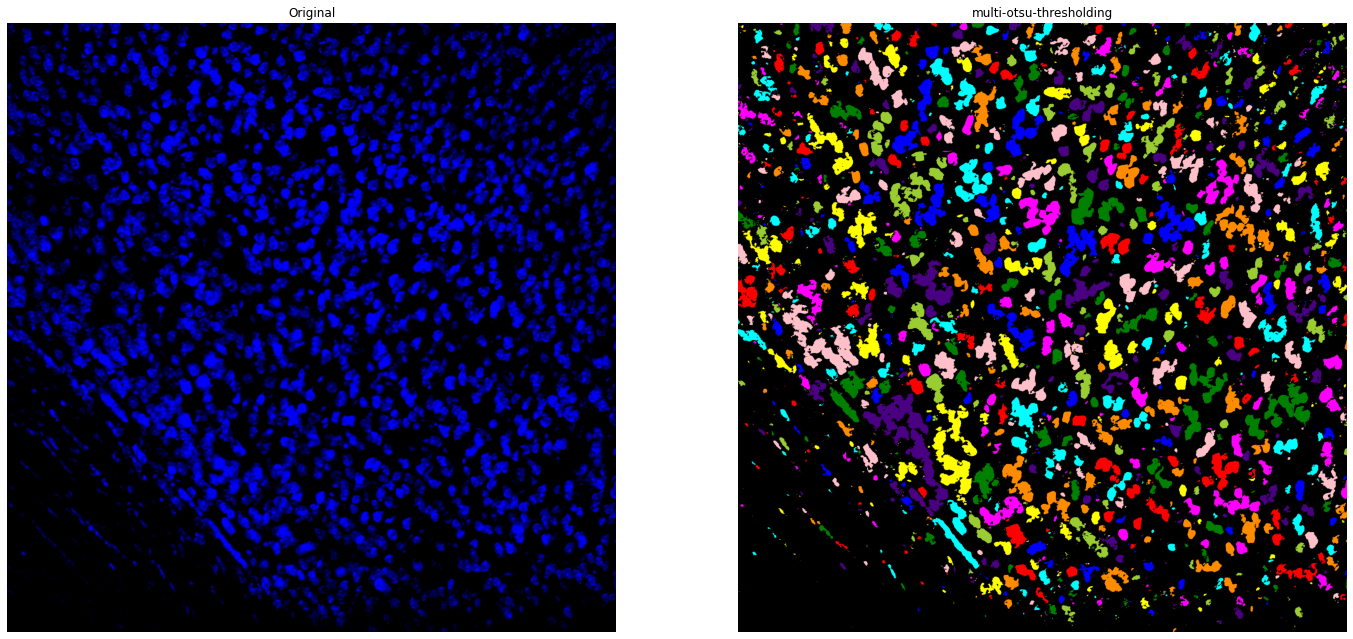

In [28]:
fig, ax = plt.subplots(ncols=2, figsize=(24, 12))
ax[0].imshow(image)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(label2rgb(labeled_cells, bg_label=0))
ax[1].set_title('multi-otsu-thresholding')
ax[1].axis('off')
plt.show()

In [ ]:
# for i in range(len(clf.cv_results_['params'])):
#     exp = Experiment(api_key=comet_cred["api_key"],
#                      workspace=comet_cred["workspace"],
#                      project_name=["project_name"])
#     for k,v in clf.cv_results_.items():
#         if k == "params":
#             exp.log_parameters(v[i])
#         else:
#             exp.log_metric(k,v[i])
            

In [ ]:
# dump(model_name, 'baseline.pkl')